In [2]:
#FOR KAGGLE API DOWNLOADING(OWN JSON FILE)
from google.colab import files
files.upload()

{}

In [3]:
#KAGGLE API HANDLE--
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
#DATASET URL
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda


Dataset URL: https://www.kaggle.com/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda
License(s): unknown
animal-image-datasetdog-cat-and-panda.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
#  READ AND UNZIP THE ZIP FILE TO THE FOLDER "animal_dataset"
import zipfile

with zipfile.ZipFile("animal-image-datasetdog-cat-and-panda.zip", 'r') as zip_ref:
    zip_ref.extractall("animal_dataset")


In [5]:
# CHECKING HOW MANY IMAGES ARE IN EACH FOLDER
import os
base_path = "animal_dataset/animals/animals"

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    print(f"{folder}: {len(os.listdir(folder_path))} images")

dogs: 1000 images
panda: 1000 images
cats: 1000 images


In [7]:
!ls animal_dataset

animals  images


In [6]:
# KEEPING THE FIRST 100 IMAGES OF EACH FOLDER, REST ARE DELETED.
import os

base_path = "animal_dataset/animals/animals"
folders = ['dogs', 'cats', 'panda']
max_images = 100

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    images = sorted(os.listdir(folder_path))

    images_to_delete = images[max_images:]

    print(f"Deleting {len(images_to_delete)} images from {folder}...")
    for img_name in images_to_delete:
        img_path = os.path.join(folder_path, img_name)
        try:
            os.remove(img_path)
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print("Deletion complete. Now each folder contains only the first 100 images.")


Deleting 900 images from dogs...
Deleting 900 images from cats...
Deleting 900 images from panda...
Deletion complete. Now each folder contains only the first 100 images.


In [7]:
import os

base_path = "animal_dataset/animals/animals"  # Your dataset path
folders = ['dogs', 'cats', 'panda']

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    num_images = len(os.listdir(folder_path))
    print(f"{folder} folder has {num_images} images")


dogs folder has 100 images
cats folder has 100 images
panda folder has 100 images


START


In [8]:
# PREPARING THE DATA-- RESIZING, FLATTENING TO CONVERT THE 3D IMAGE TO 1D VECTOR , LABELLING , CONVERTING TO NUMPY ARRAYS
import os
import cv2
import numpy as np

dataset_path = 'animal_dataset/animals/animals'
classes = ['dogs', 'cats', 'panda']
num_images = 100
img_size = (64, 64)

features = []
labels = []

for label_idx, class_name in enumerate(classes):
    folder = os.path.join(dataset_path, class_name)
    files = sorted(os.listdir(folder))[:num_images]

    for file_name in files:
        path = os.path.join(folder, file_name)
        img = cv2.imread(path)
        if img is None:
            print("Failed to load:", path)
            continue


        img_resized = cv2.resize(img, img_size)


        img_flat = img_resized.flatten()

        features.append(img_flat)
        labels.append(label_idx)


X = np.array(features)  # shape (300, 12288)
y = np.array(labels)    # shape (300,)

print("Data shape:", X.shape)
print("Labels shape:", y.shape)
print("Labels:", np.unique(y))


Data shape: (300, 12288)
Labels shape: (300,)
Labels: [0 1 2]


Fold 1, k=1, Accuracy: 0.350
Fold 1, k=3, Accuracy: 0.350
Fold 1, k=5, Accuracy: 0.333
Fold 1, k=7, Accuracy: 0.383
Fold 1, k=9, Accuracy: 0.433
Fold 1, k=11, Accuracy: 0.433
Fold 1, k=13, Accuracy: 0.483
Fold 1, k=15, Accuracy: 0.433
Fold 1, k=17, Accuracy: 0.450
Fold 1, k=19, Accuracy: 0.417
Fold 2, k=1, Accuracy: 0.400
Fold 2, k=3, Accuracy: 0.517
Fold 2, k=5, Accuracy: 0.417
Fold 2, k=7, Accuracy: 0.533
Fold 2, k=9, Accuracy: 0.500
Fold 2, k=11, Accuracy: 0.517
Fold 2, k=13, Accuracy: 0.533
Fold 2, k=15, Accuracy: 0.583
Fold 2, k=17, Accuracy: 0.550
Fold 2, k=19, Accuracy: 0.533
Fold 3, k=1, Accuracy: 0.467
Fold 3, k=3, Accuracy: 0.383
Fold 3, k=5, Accuracy: 0.400
Fold 3, k=7, Accuracy: 0.483
Fold 3, k=9, Accuracy: 0.450
Fold 3, k=11, Accuracy: 0.400
Fold 3, k=13, Accuracy: 0.417
Fold 3, k=15, Accuracy: 0.433
Fold 3, k=17, Accuracy: 0.417
Fold 3, k=19, Accuracy: 0.417
Fold 4, k=1, Accuracy: 0.333
Fold 4, k=3, Accuracy: 0.400
Fold 4, k=5, Accuracy: 0.417
Fold 4, k=7, Accuracy: 0.383

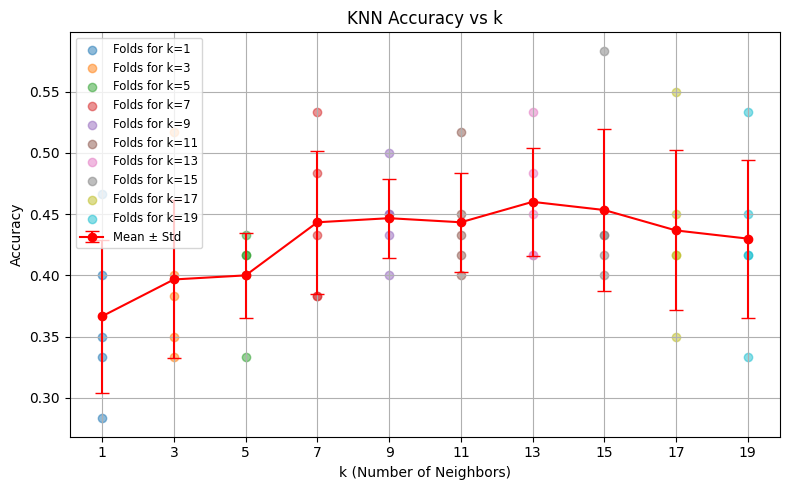

In [9]:
# (KNN,CROSS VALIDATION)

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
np.random.seed(42)  # RANDOM SO THAT EVERY TIME IT RUNS IT GIVES THE SAME VALUE

# Euclidean distance between two feature vectors
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# KNN prediction for one test instance
def knn_predict(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# STRATIFIED K-FOLDS , SO EACH FOLD GETS EQUAL NUMBER OF DOGS, CATS AND PANDAS IMAGES
def stratified_kfold(X, y, n_splits=5):
    folds_X = [[] for _ in range(n_splits)]
    folds_y = [[] for _ in range(n_splits)]

    classes = np.unique(y)
    for cls in classes:
        cls_indices = np.where(y == cls)[0]
        np.random.shuffle(cls_indices)
        split_indices = np.array_split(cls_indices, n_splits)
        for i in range(n_splits):
            folds_X[i].extend(X[split_indices[i]])
            folds_y[i].extend(y[split_indices[i]])

    for i in range(n_splits):
        folds_X[i] = np.array(folds_X[i])
        folds_y[i] = np.array(folds_y[i])

    return folds_X, folds_y

# CROSS VALIDATION
def cross_validate_knn(X, y, k_values, n_splits=5):
    folds_X, folds_y = stratified_kfold(X, y, n_splits)
    accuracies = {k: [] for k in k_values}

    for i in range(n_splits):
        X_test, y_test = folds_X[i], folds_y[i]
        X_train = np.vstack([folds_X[j] for j in range(n_splits) if j != i])
        y_train = np.hstack([folds_y[j] for j in range(n_splits) if j != i])

        for k in k_values:
            correct = 0
            for idx in range(len(X_test)):
                pred = knn_predict(X_train, y_train, X_test[idx], k)
                if pred == y_test[idx]:
                    correct += 1
            accuracy = correct / len(X_test)
            accuracies[k].append(accuracy)
            print(f'Fold {i+1}, k={k}, Accuracy: {accuracy:.3f}')

  # Printing  mean and std accuracies
    for k in k_values:
        mean_acc = np.mean(accuracies[k])
        std_acc = np.std(accuracies[k])
        print(f'k={k} -> Mean Accuracy: {mean_acc:.3f}, Std: {std_acc:.3f}')

    return accuracies

# Plotting function to show all folds, mean line, and error bars
def plot_accuracies(k_values, accuracies):
    mean_accuracies = [np.mean(accuracies[k]) for k in k_values]
    std_accuracies = [np.std(accuracies[k]) for k in k_values]

    plt.figure(figsize=(8, 5))

    for k in k_values:
        plt.scatter([k]*len(accuracies[k]), accuracies[k], alpha=0.5, label=f'Folds for k={k}')

    # Plotting mean accuracy line with error bars
    plt.errorbar(k_values, mean_accuracies, yerr=std_accuracies, fmt='-o', color='red', capsize=5, label='Mean ± Std')

    plt.title("KNN Accuracy vs k")
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Accuracy")
    #plt.ylim(0, 1.05)
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend(fontsize='small', loc='best')
    plt.tight_layout()
    plt.show()

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

accuracies = cross_validate_knn(X, y, k_values)
plot_accuracies(k_values, accuracies)
